In [4]:
from huffTreeUtilities import * #TODO RECOPY THESE FILES

I = loadHuffableImage('happyFace.png')
encoder, decoder = buildHuffPair(I)
enI = ''.join(encoder[pix] for pix in I.ravel())

loadHuffableImage: input is multi-channel, using grayscale.
loadHuffableImage: Setting range to [0, 255]


In [5]:
def decode(encoded):
    out = []
    while not encoded == "": 
        i = 1
        cut = encoded[:i]
        while cut not in decoder.keys():
            i = i + 1
            cut = encoded[:i]
        out.append(decoder[cut].astype(np.uint8))
        encoded = encoded[i:]
    return out

In [6]:
#print(t)
len(enI)
out = decode(enI)

In [7]:
len(out)
I.size
reconstuction = np.array(out)
reconstuction = reconstuction.reshape(I.shape)

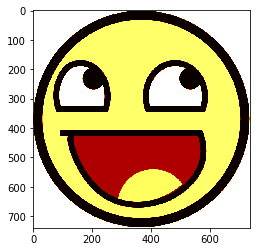

In [8]:
plt.imshow(reconstuction, cmap="hot")

In [9]:
I = plt.imread("earth2.jpg")
encoder, decoder = buildHuffPair(I)
enI = ''.join(encoder[pix] for pix in I.ravel())

out = decode(enI)
reconstuction = np.array(out)
reconstuction = reconstuction.reshape(I.shape)

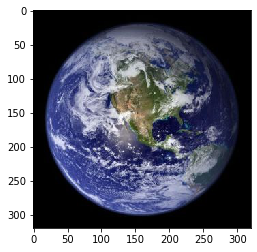

In [10]:
plt.imshow(reconstuction)

In [20]:
import sys
import numpy as np
def getCompressionStats(fileName):
    I = plt.imread(fileName)
    if(type(I[0,0,0]) == np.float32):
        I = (I * 255)  
    print(fileName , "is", I.nbytes, "bytes")
    
    colors = ["Red", "Blue", "Green"]
    for chan in range(3):
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(fileName + "'s", colors[chan], "channle is", I.nbytes, "bytes")
        allbins = np.unique(I[...,chan].ravel())
        encoder, decoder = buildHuffPair(I[...,chan])
        enI = ''.join(encoder[pix] for pix in I[...,chan].ravel())
        compSize = sys.getsizeof(decoder)+(len(enI)/8) #pretending that enI is a bitArray
        huffBitPixel = (compSize*8)/(I.shape[0]*I.shape[1]) #bits per pixle
        print("compressed image's", colors[chan] ,"channle is",  compSize ,"bytes or", huffBitPixel, "bits per pixel")
        freqs = np.histogram(I[...,chan],allbins)
        probs = freqs[0]/freqs[0].sum() # probabilities 
        print(colors[chan] ,"channel entropy is ",-(probs * np.log2(probs)).sum(), "bits/pixel")
    #return encoder
#    x * np.log2(x

In [21]:
earthEnc = getCompressionStats("earth2.jpg")
print("-------------------------- \n \n")
faceEnc = getCompressionStats("happyFace.png")


earth2.jpg is 307200 bytes
++++++++++++++++++++++++++++++++++++++++++++++++++++
earth2.jpg's Red channle is 307200 bytes
compressed image's Red channle is 86020.375 bytes or 6.720341796875 bits per pixel
Red channel entropy is  5.947979586232471 bits/pixel
++++++++++++++++++++++++++++++++++++++++++++++++++++
earth2.jpg's Blue channle is 307200 bytes
compressed image's Blue channle is 86416.125 bytes or 6.751259765625 bits per pixel
Blue channel entropy is  5.981984371723275 bits/pixel
++++++++++++++++++++++++++++++++++++++++++++++++++++
earth2.jpg's Green channle is 307200 bytes
compressed image's Green channle is 88024.5 bytes or 6.8769140625 bits per pixel
Green channel entropy is  6.112037905012562 bits/pixel
-------------------------- 
 

happyFace.png is 6553440 bytes
++++++++++++++++++++++++++++++++++++++++++++++++++++
happyFace.png's Red channle is 6553440 bytes
compressed image's Red channle is 164804.875 bytes or 2.4141928513879733 bits per pixel
Red channel entropy is  1.5767

{88: '11',
 255: '10',
 0: '01',
 69: '001',
 223: '0001',
 47: '0000111111',
 31: '0000111110',
 176: '00001111011',
 43: '000011110101',
 30: '0000111101001',
 136: '0000111101000',
 192: '0000111100',
 5: '000011101',
 82: '000011100',
 127: '00001101111',
 203: '0000110111011',
 97: '0000110111010',
 25: '000011011100',
 60: '0000110110',
 44: '000011010',
 38: '0000110011',
 17: '0000110010',
 160: '0000110001',
 27: '0000110000',
 191: '00001011111',
 144: '00001011110',
 51: '000010111011',
 56: '000010111010',
 4: '00001011100',
 15: '000010110',
 224: '0000101011',
 146: '000010101011',
 167: '00001010101011',
 139: '00001010101010',
 21: '0000101010100',
 12: '000010101001',
 8: '000010101000',
 63: '000010100',
 55: '000010011',
 49: '0000100101',
 208: '0000100100',
 16: '000010001',
 239: '00001000011',
 68: '00001000010111111',
 84: '000010000101111101',
 42: '00001000010111110011111',
 86: '00001000010111110011110',
 67: '0000100001011111001110',
 131: '00001000010111110

In [44]:
import pandas as pd
df = pd.DataFrame.from_dict(earthEnc, orient="index")
df['#bits'] = df.iloc[:,0].apply(len)

In [47]:
df.sort_values(by=['#bits'])[:20] #the difference beetween the intensity 0 vs 1 is 4 bits 

,0,#bits
0,11,2
1,011011,6
64,0000011,7
63,0000101,7
65,0000111,7
2,1011010,7
61,0000001,7
50,01000110,8
99,01011010,8
163,01011001,8
